<a href="https://colab.research.google.com/github/praful0123/praful/blob/main/Code%20Alpha_Unemployment%20Analysis%20using%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment in India.csv to Unemployment in India.csv


In [ ]:
df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Basic data cleaning
df.info()
df.isnull().sum()
df.columns


df.rename(columns=lambda x: x.strip(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
# Step 4: Data Exploration
print("Unique regions:", df['Region'].unique())

# Convert 'Date' column to datetime first
df['Date'] = pd.to_datetime(df['Date'])

# Now safely print the date range
print("Date range:", df['Date'].min(), "to", df['Date'].max())
df.describe()

Unique regions: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']
Date range: 2019-05-31 00:00:00 to 2020-06-30 00:00:00


/tmp/ipython-input-19-3337234066.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


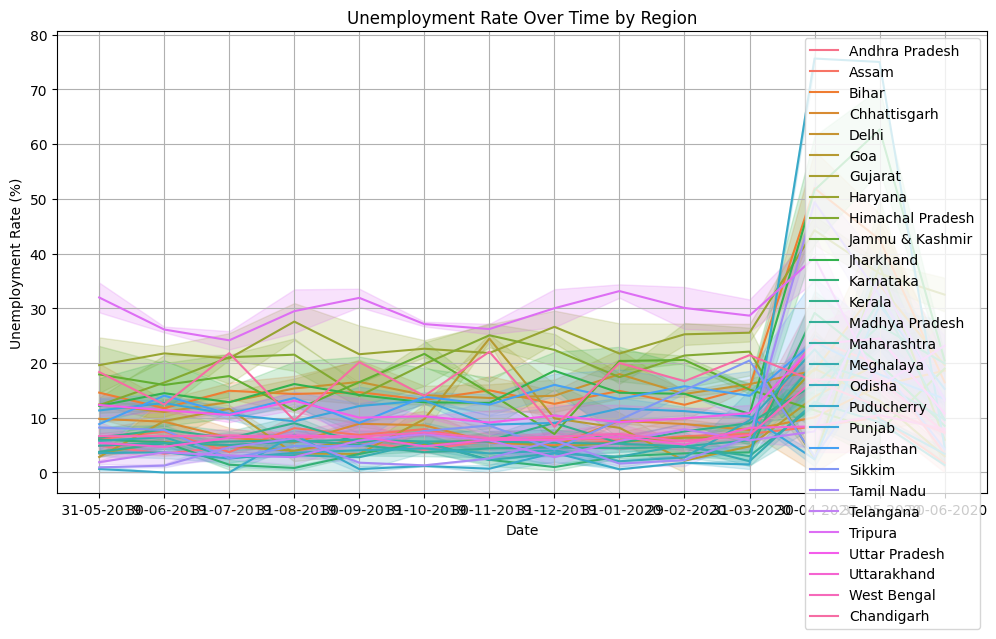

In [ ]:
# Step 5: Data Visualization

# Unemployment Rate over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

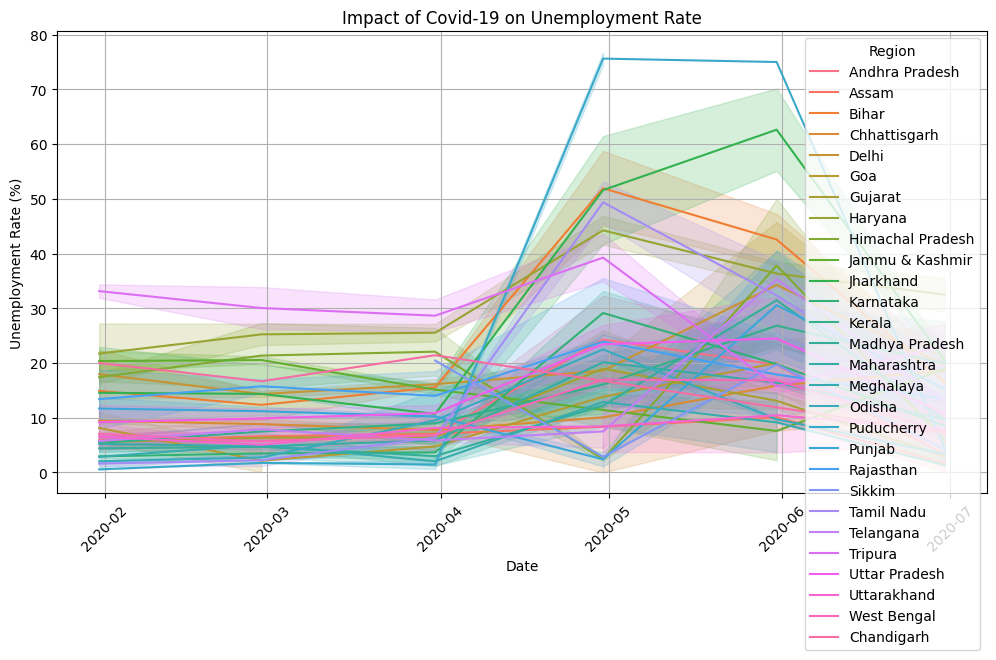

In [ ]:
# Step 6: Covid-19 Impact (2020 onward)
covid_df = df[df['Date'] >= '2020-01-01']

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region')
plt.title('Impact of Covid-19 on Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipython-input-21-2871199533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')


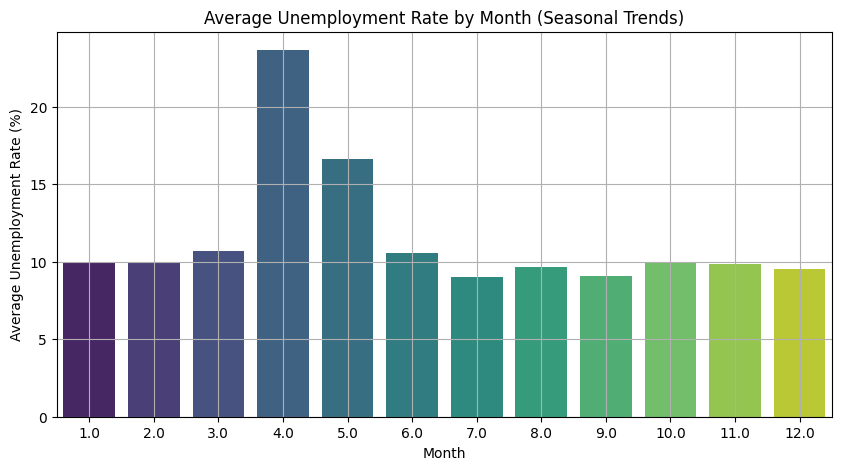

In [ ]:
# Step 7: Seasonal Trends (Monthly average)
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average Unemployment Rate by Month (Seasonal Trends)')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [ ]:
# Step 8: Insights
print("Insight 1: Highest unemployment rate recorded on:", df.loc[df['Estimated Unemployment Rate (%)'].idxmax()])
print("\nInsight 2: Average unemployment rate during Covid-19 (2020+):", covid_df['Estimated Unemployment Rate (%)'].mean())
print("\nInsight 3: Region with highest avg unemployment:", df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().idxmax())

Insight 1: Highest unemployment rate recorded on: Region                                              Puducherry
Date                                       2020-04-30 00:00:00
Frequency                                              Monthly
Estimated Unemployment Rate (%)                          76.74
Estimated Employed                                     68122.0
Estimated Labour Participation Rate (%)                  35.54
Area                                                     Urban
Month                                                      4.0
Name: 627, dtype: object

Insight 2: Average unemployment rate during Covid-19 (2020+): 15.10158064516129

Insight 3: Region with highest avg unemployment: Tripura
